# Data Understanding

Import libraries to import CSV into DataFrame

We will create a schema based on insights from our presentation about our features. Then we will leverage our own functions to create customized spark sessions, suited for the analysis for different machines. For example `create_spark_session` prepares SparkSession to work on 6 core CPU with 16 gb of ram with possible NLPSpark capabilities. Then we load our dataset using `load_csv_to_df` that streamlines loading csv data into Spark DataFrame. At the end of this step we must fix some column names, as origianlly these contained `.` symbol and messed with internal functions of PySpark.

In [1]:
from pyspark.sql.types import (
    StructType, StructField, 
    StringType, IntegerType, 
    DateType, LongType, 
    BooleanType
)

from utils import load_csv_to_df, create_optimized_spark_session, create_spark_session

podcast_schema = StructType([
    # Date type features
    StructField("date", DateType(), True),
    StructField("release_date", DateType(), True),
    
    # Numerical features
    StructField("rank", IntegerType(), True),
    StructField("duration_ms", LongType(), True),
    StructField("show_total_episodes", IntegerType(), True),
    
    # Binary (Boolean) features
    StructField("explicit", BooleanType(), True),
    StructField("is_externally_hosted", BooleanType(), True),
    StructField("is_playable", BooleanType(), True),
    StructField("show_is_externally_hosted", BooleanType(), True),
    StructField("show_explicit", BooleanType(), True),
    
    # Nominal (Categorical String) features
    StructField("region", StringType(), True),
    StructField("episodeUri", StringType(), True),
    StructField("showUri", StringType(), True),
    StructField("episodeName", StringType(), True),
    StructField("description", StringType(), True),
    StructField("show_name", StringType(), True),
    StructField("show_description", StringType(), True),
    StructField("show_ublisher", StringType(), True),
    StructField("language", StringType(), True),
    StructField("languages", StringType(), True),
    StructField("show_copyrights", StringType(), True),
    StructField("show_href", StringType(), True),
    StructField("show_html_description", StringType(), True),
    StructField("show_languages", StringType(), True),
    StructField("show_media_type", StringType(), True),
    StructField("show_type", StringType(), True),
    StructField("show_uri", StringType(), True),
    
    # Ordinal features
    StructField("chartRankMove", StringType(), True),
    StructField("release_date_precision", StringType(), True)
])

spark = create_spark_session()
df = load_csv_to_df(spark, "top_podcasts.csv")

for col in df.columns:
  df = df.withColumnRenamed(col, col.replace('.', '_'))


24/12/06 12:46:21 WARN Utils: Your hostname, inspiron resolves to a loopback address: 127.0.1.1; using 131.114.163.198 instead (on interface wlp2s0)
24/12/06 12:46:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/sillem/miniconda3/envs/ddam_env/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/sillem/.ivy2/cache
The jars for the packages stored in: /home/sillem/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-0c05e1d5-1153-4cbd-82de-499eb4e59c6a;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.5.1 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.12.500 in centra

DataFrame loaded with 228800 rows and 29 columns


We verify if the data was correctly loaded. We see that we have 29 columns, 228800 rows. Inspection shows that the data were indeed correctly loaded.

In [2]:
from utils import print_dataframe_info
print_dataframe_info(df)

Number of rows: 228800
Number of columns: 29

Column names:
- date
- rank
- region
- chartRankMove
- episodeUri
- showUri
- episodeName
- description
- show_name
- show_description
- show_publisher
- duration_ms
- explicit
- is_externally_hosted
- is_playable
- language
- languages
- release_date
- release_date_precision
- show_copyrights
- show_explicit
- show_href
- show_html_description
- show_is_externally_hosted
- show_languages
- show_media_type
- show_total_episodes
- show_type
- show_uri

Schema:
root
 |-- date: date (nullable = true)
 |-- rank: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- chartRankMove: string (nullable = true)
 |-- episodeUri: string (nullable = true)
 |-- showUri: string (nullable = true)
 |-- episodeName: string (nullable = true)
 |-- description: string (nullable = true)
 |-- show_name: string (nullable = true)
 |-- show_description: string (nullable = true)
 |-- show_publisher: string (nullable = true)
 |-- duration_ms: integer (nu

# EDA

Here we leverage function for automatic analysis of the features. It's capacities are as follows:
1. Automatically detects and categorizes DataFrame columns into data types (date, numerical, binary, categorical, ordinal).
2. Calculates comprehensive statistics for numerical columns including min, max, mean, standard deviation, and quartiles.
3. Analyzes date columns by finding date ranges, temporal coverage
4. Profiles categorical and binary columns by counting unique values, frequencies, and value distributions.
5. Measures data quality through null value analysis
7. Returns results in both human-readable printed format and a structured dictionary for programmatic use.

In [3]:
from auto_eda import analyze_podcast_dataset

# Load and analyze your data
stats = analyze_podcast_dataset(df)


Verifying loaded schema:
root
 |-- date: date (nullable = true)
 |-- rank: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- chartRankMove: string (nullable = true)
 |-- episodeUri: string (nullable = true)
 |-- showUri: string (nullable = true)
 |-- episodeName: string (nullable = true)
 |-- description: string (nullable = true)
 |-- show_name: string (nullable = true)
 |-- show_description: string (nullable = true)
 |-- show_publisher: string (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- is_externally_hosted: boolean (nullable = true)
 |-- is_playable: boolean (nullable = true)
 |-- language: string (nullable = true)
 |-- languages: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- release_date_precision: string (nullable = true)
 |-- show_copyrights: string (nullable = true)
 |-- show_explicit: boolean (nullable = true)
 |-- show_href: string (nullable = true)
 |-- show_html_descr

24/12/06 12:46:59 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+-------------------+----------+-------------------+------------+---------------------+-------------------+----------------------------+----------------+-------------------------+-------------+----------------------+-----------------+--------------------------+-----------------+--------------------------+---------------+------------------------+----------------------+-------------------------------+--------------------+-----------------------------+-----------------+--------------------------+--------------+-----------------------+--------------------------+-----------------------------------+-----------------+--------------------------+--------------+-----------------------+---------------+------------------------+------------------+---------------------------+----------------------------+-------------------------------------+---------------------+------------------------------+-------------------+----------------------------+---------------+------------------------+-------


Analysis Results:

=== Date Feature Statistics ===

Column: date
min_date: 2024-09-02
max_date: 2024-10-24
date_range_days: 52
non_null_count: 228800
null_percentage: 0.0

Column: release_date
min_date: 2012-08-21
max_date: 2024-10-23
date_range_days: 4446
non_null_count: 228800
null_percentage: 0.0

=== Numerical Feature Statistics ===

Column: rank
min: 1.0
max: 200.0
mean: 100.5
stddev: 57.73443139465412
q1: 50.0
median: 100.0
q3: 149.0
iqr: 99.0
non_null_count: 228800
null_percentage: 0.0

Column: duration_ms
min: 5291.0
max: 42349156.0
mean: 3414740.048789336
stddev: 3077306.0879737935
q1: 1540920.0
median: 2794449.0
q3: 4240800.0
iqr: 2699880.0
non_null_count: 228800
null_percentage: 0.0

Column: show_total_episodes
min: 1.0
max: 8630.0
mean: 376.49143356643356
stddev: 569.5139512823217
q1: 72.0
median: 199.0
q3: 431.0
iqr: 359.0
non_null_count: 228800
null_percentage: 0.0

=== Binary Feature Statistics ===

Column: explicit
unique_count: 2
non_null_count: 228800
null_percentage

Based on this `stats` dict we got many information about the dataset. These information will be used in the report, here we will focus on the execution of the code to avoid redundancy.

## Vizualization
In this section we will focus on creating some figures for the report. We will leverage our own `viz` module that takes in DataFrame and directly analyzes it to give us charts we might be interested in.

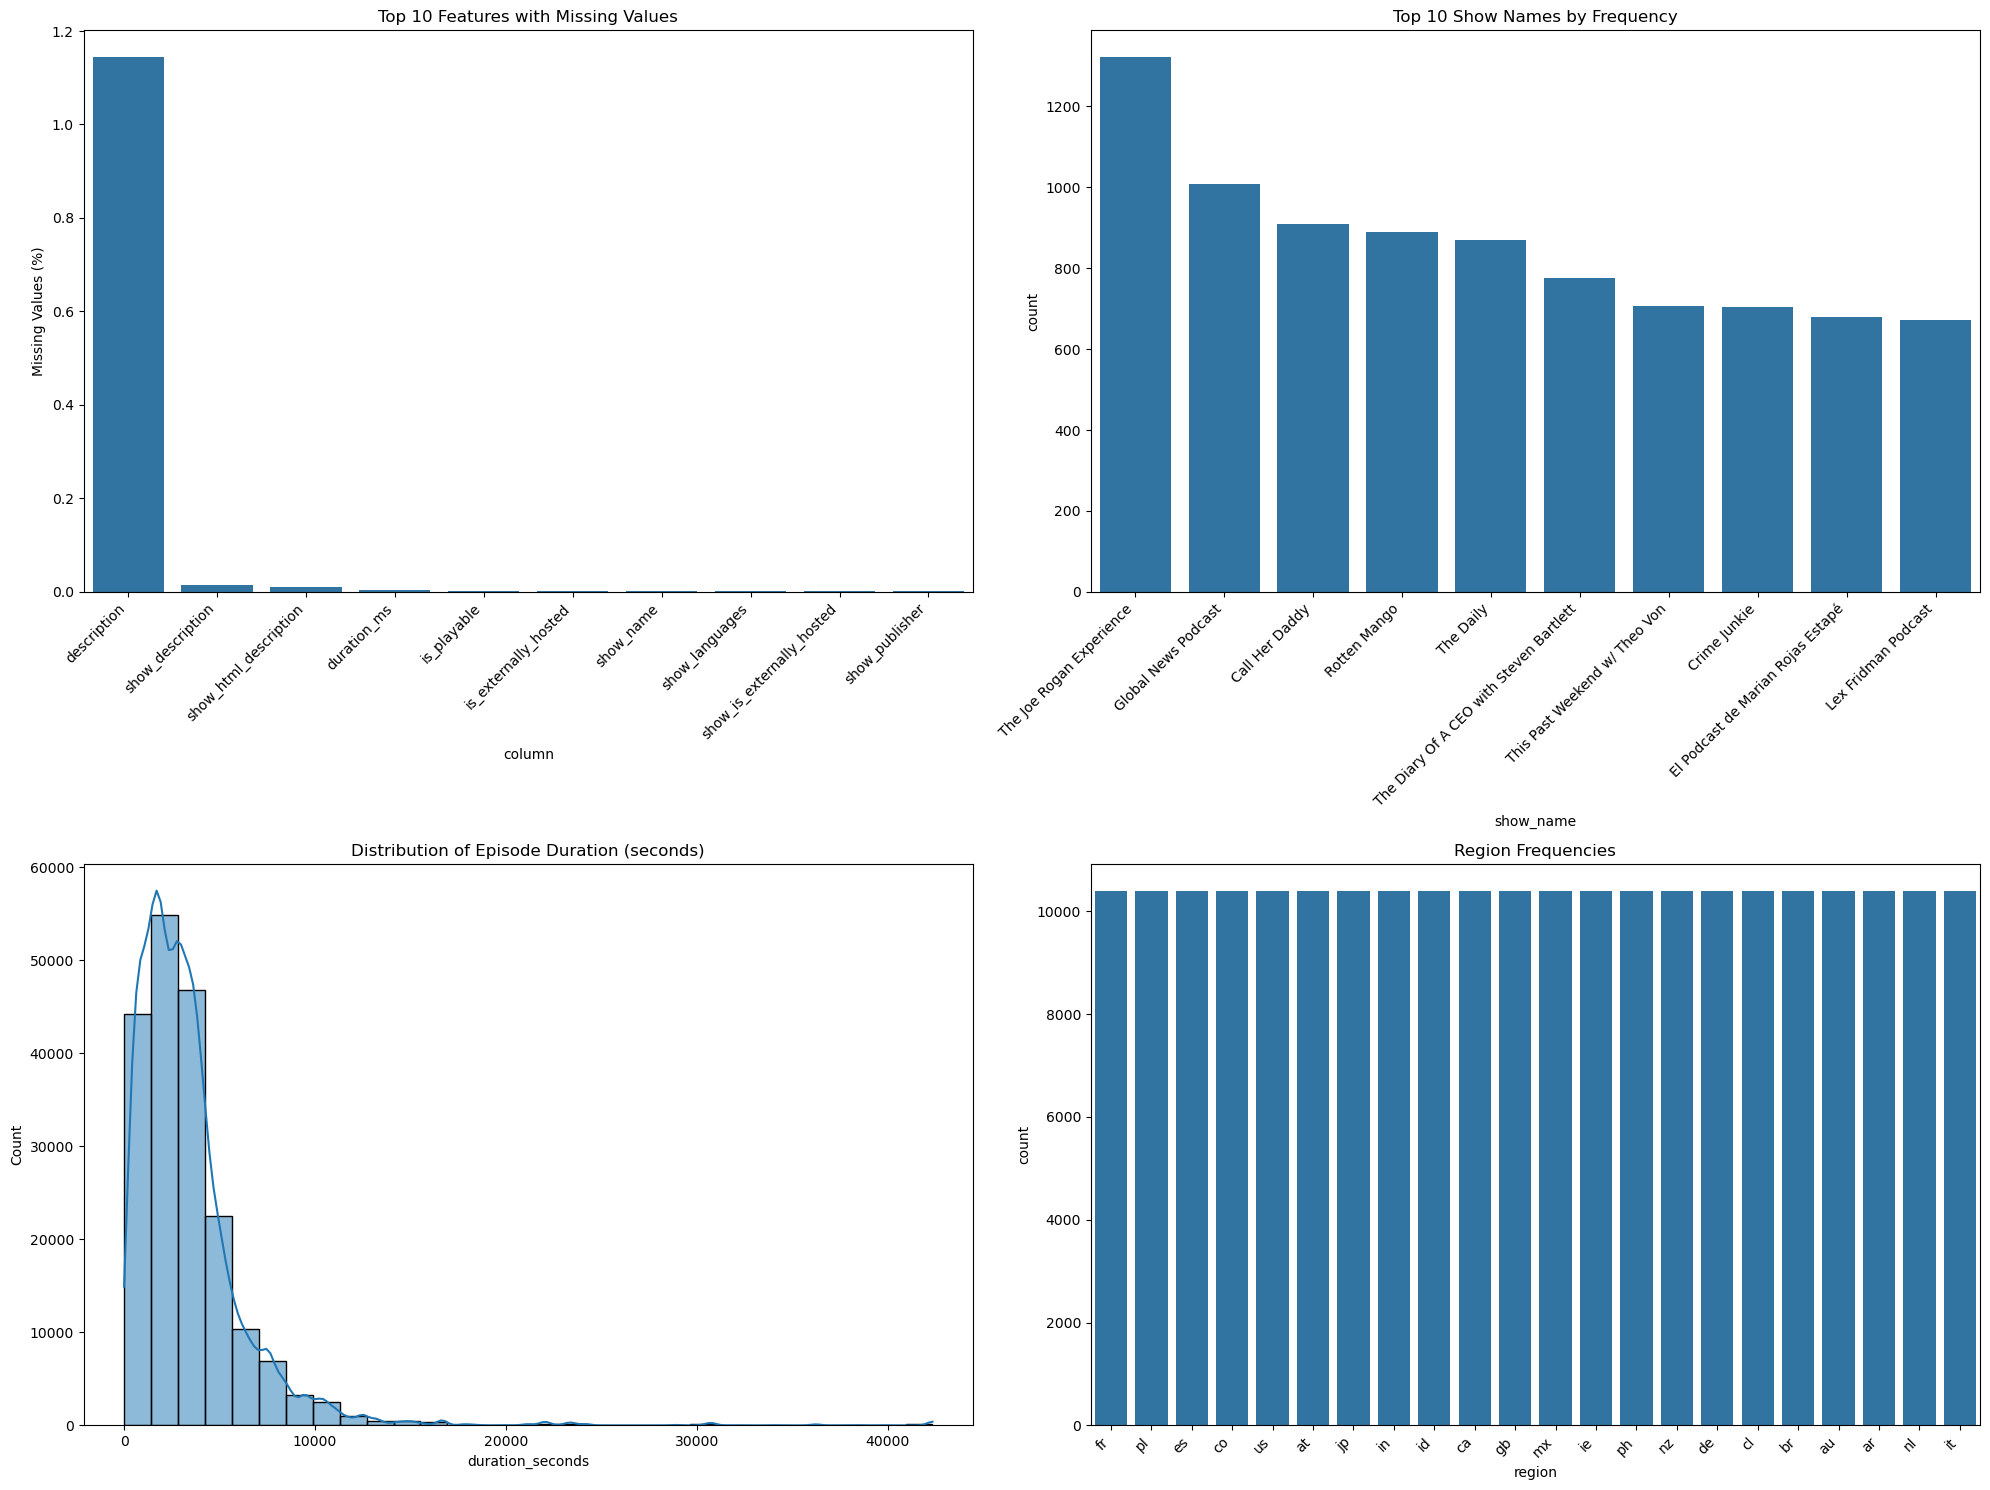

In [3]:
import matplotlib.pyplot as plt
from viz import visualize_all_stats

visualize_all_stats(df)
plt.show()


Now we will look for duplicates.

In [5]:
# Count all duplicated rows (considering all columns)
duplicates = df.exceptAll(df.dropDuplicates())
print(f"Total number of duplicate rows: {duplicates.count()}")

Total number of duplicate rows: 0
